In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import pylab as pl

# Display HTML
from IPython.core.display import display, HTML

C:\Users\ATUL\AppData\Local\Temp\ipykernel_16820\1784462967.py:15: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [30]:
iris=pd.read_csv('C:/Users/ATUL/OneDrive/Desktop/ML Book/ML Dataset/basket_analysis.csv')

In [31]:
iris.head()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
print(iris.shape)

(999, 17)


In [33]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    999 non-null    int64
 1   Apple         999 non-null    bool 
 2   Bread         999 non-null    bool 
 3   Butter        999 non-null    bool 
 4   Cheese        999 non-null    bool 
 5   Corn          999 non-null    bool 
 6   Dill          999 non-null    bool 
 7   Eggs          999 non-null    bool 
 8   Ice cream     999 non-null    bool 
 9   Kidney Beans  999 non-null    bool 
 10  Milk          999 non-null    bool 
 11  Nutmeg        999 non-null    bool 
 12  Onion         999 non-null    bool 
 13  Sugar         999 non-null    bool 
 14  Unicorn       999 non-null    bool 
 15  Yogurt        999 non-null    bool 
 16  chocolate     999 non-null    bool 
dtypes: bool(16), int64(1)
memory usage: 23.5 KB


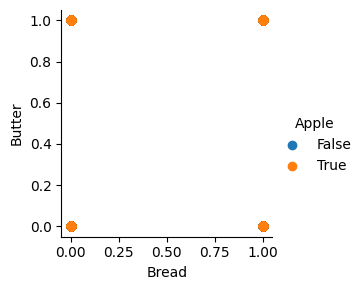

In [34]:
sns.FacetGrid(iris,hue='Apple')\
.map(plt.scatter,'Bread','Butter')\
.add_legend()

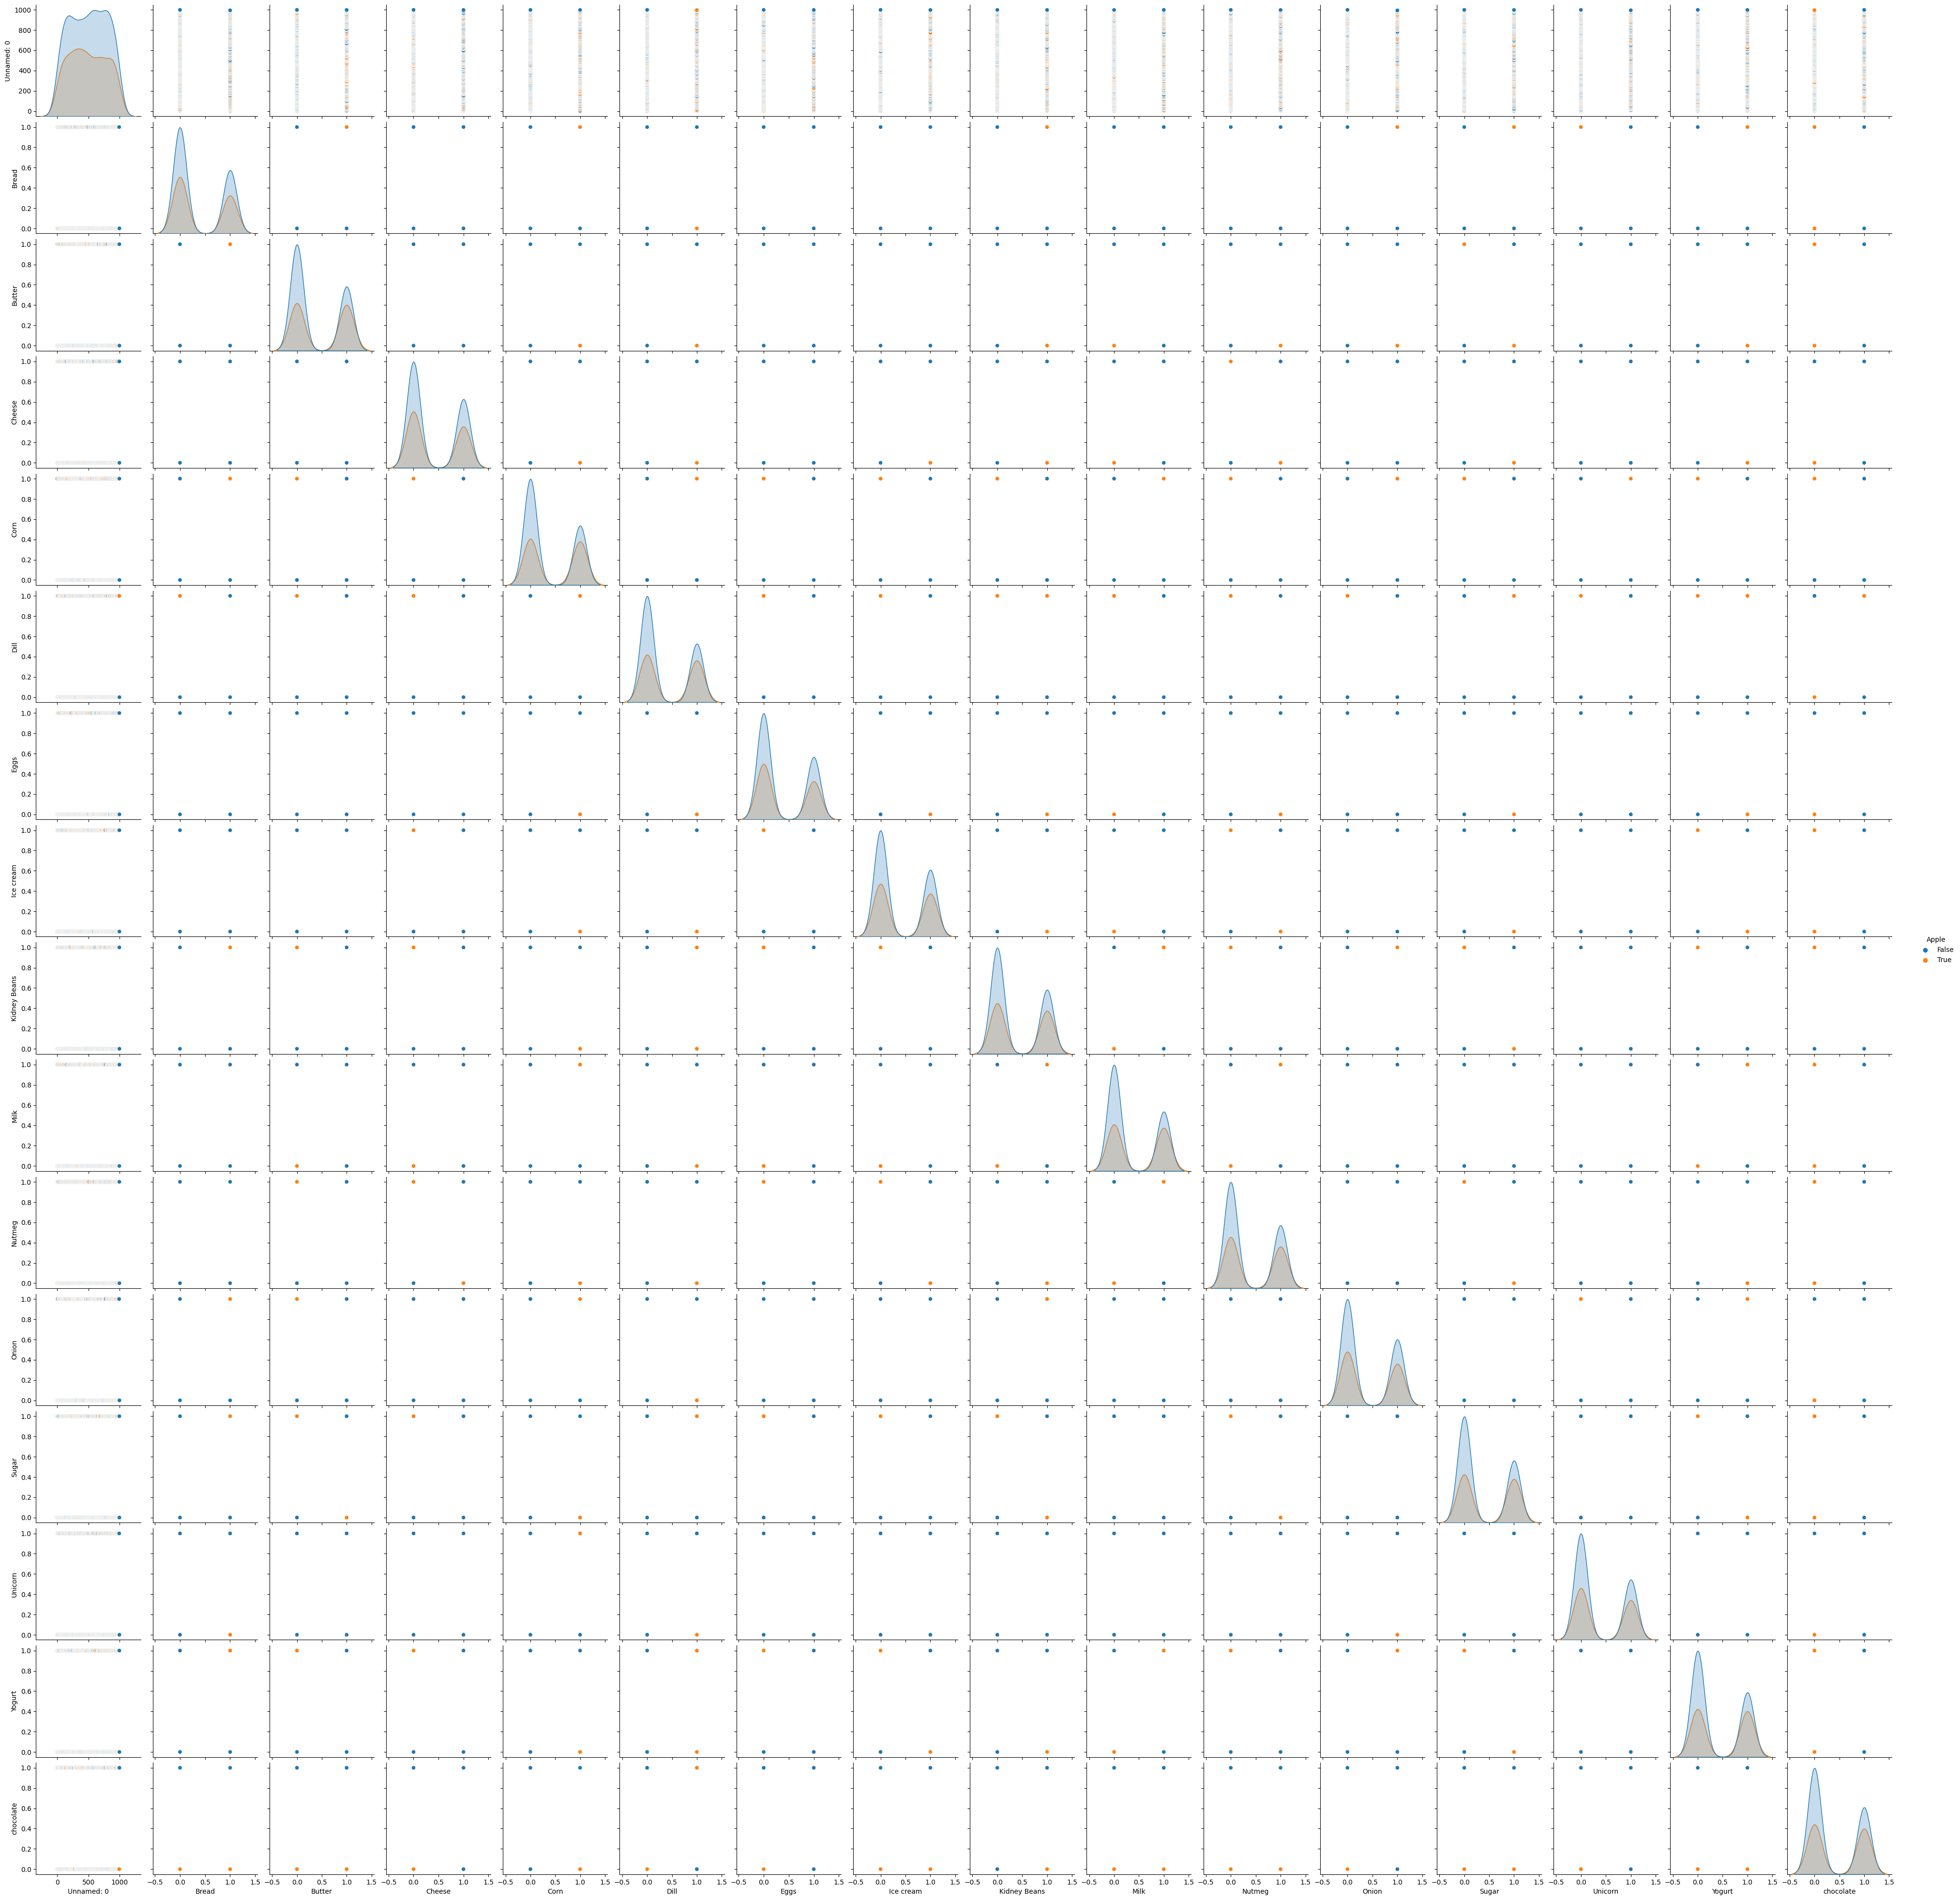

In [35]:
sns.pairplot(iris,hue='Apple')

In [36]:
X = iris.iloc[:, :-1].values    #   X -> Feature Variables
iris.head();
y = iris.iloc[:, -1].values #   y ->  Target

In [37]:
# Splitting the data into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [38]:
#converting object data type into int data type using labelEncoder for Linear reagration in this case

XL = iris.iloc[:, :-1].values    #   X -> Feature Variables
yL = iris.iloc[:, -1].values #   y ->  Target

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train= le.fit_transform(yL)

print(Y_train)  # this is Y_train categotical to numerical

[1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1
 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1
 1 1 0 1 0 0 1 0 0 0 0 1 

In [39]:
# This is only for Linear Regretion 
X_trainL, X_testL, y_trainL, y_testL = train_test_split(XL, Y_train, test_size = 0.3, random_state = 0)

In [40]:
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression()
modelLR.fit(X_trainL, y_trainL)

Y_pred = modelLR.predict(X_testL)

In [41]:
from sklearn import metrics
#calculating the residuals
print('y-intercept             :' , modelLR.intercept_)
print('beta coefficients       :' , modelLR.coef_)
print('Mean Abs Error MAE      :' ,metrics.mean_absolute_error(y_testL,Y_pred))
print('Mean Sqrt Error MSE     :' ,metrics.mean_squared_error(y_testL,Y_pred))
print('Root Mean Sqrt Error RMSE:' ,np.sqrt(metrics.mean_squared_error(y_testL,Y_pred)))
print('r2 value                :' ,metrics.r2_score(y_testL,Y_pred))

y-intercept             : 0.1761036808546056
beta coefficients       : [-6.10217345e-05 -1.09200388e-03  1.01039143e-01  7.06799497e-02
  2.40259308e-02  2.51308148e-02  8.53814049e-02  4.22045640e-02
  6.77707733e-02  3.74233387e-02  8.81266031e-02  2.92895600e-02
  1.90590687e-02  1.52471279e-04  9.11126817e-02  3.95099735e-02]
Mean Abs Error MAE      : 0.45674600546702226
Mean Sqrt Error MSE     : 0.23374390410404375
Root Mean Sqrt Error RMSE: 0.48347068587872394
r2 value                : 0.01746992810406167


In [42]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.66      0.70      0.68       183
        True       0.49      0.44      0.46       117

    accuracy                           0.60       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.59      0.60      0.60       300

[[128  55]
 [ 65  52]]
accuracy is 0.6


In [43]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.70      0.55      0.62       183
        True       0.47      0.62      0.54       117

    accuracy                           0.58       300
   macro avg       0.58      0.59      0.58       300
weighted avg       0.61      0.58      0.59       300

[[101  82]
 [ 44  73]]
accuracy is 0.58


In [44]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.62      0.87      0.73       183
        True       0.47      0.17      0.25       117

    accuracy                           0.60       300
   macro avg       0.54      0.52      0.49       300
weighted avg       0.56      0.60      0.54       300

[[160  97]
 [ 23  20]]
accuracy is  0.6


In [45]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.60      0.73      0.66       183
        True       0.36      0.24      0.29       117

    accuracy                           0.54       300
   macro avg       0.48      0.48      0.47       300
weighted avg       0.51      0.54      0.51       300

[[133  50]
 [ 89  28]]
accuracy is 0.5366666666666666


In [46]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.69      0.62      0.65       183
        True       0.49      0.56      0.52       117

    accuracy                           0.60       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.61      0.60      0.60       300

[[114  69]
 [ 52  65]]
accuracy is 0.5966666666666667


In [47]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.61      1.00      0.76       183
        True       0.00      0.00      0.00       117

    accuracy                           0.61       300
   macro avg       0.30      0.50      0.38       300
weighted avg       0.37      0.61      0.46       300

[[183   0]
 [117   0]]
accuracy is 0.61


c:\Users\ATUL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ATUL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ATUL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.66      0.69      0.68       183
        True       0.48      0.44      0.46       117

    accuracy                           0.59       300
   macro avg       0.57      0.56      0.57       300
weighted avg       0.59      0.59      0.59       300

[[127  66]
 [ 56  51]]
accuracy is  0.5933333333333334


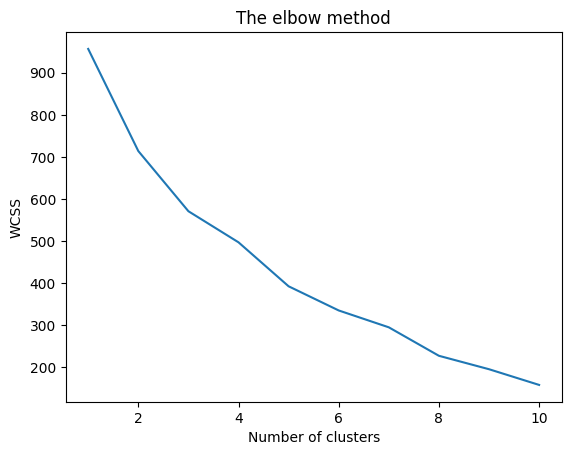

In [49]:
x = iris.iloc[:, [1, 2, 3, 4]].values

#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [50]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

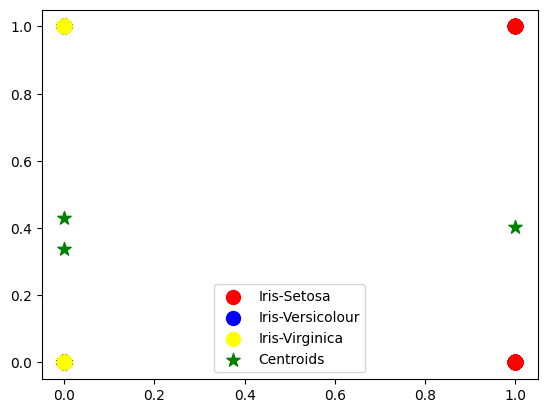

In [51]:
# Visualising the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-Versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Iris-Virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'green', label = 'Centroids',marker='*')

plt.legend()